import pandas as pd
import requests
from io import StringIO

url = "https://example.com/data.csv"
response = requests.get(url)

For CSV
df = pd.read_csv(StringIO(response.text))

print(df.head())

import pandas as pd
import glob

# Path to your folder (adjust accordingly)
path = "data/2018/"
all_files = glob.glob(path + "/*.csv")

# Load and concatenate
df_list = [pd.read_csv(file, header=None) for file in all_files]
df = pd.concat(df_list, ignore_index=True)

# UK House Price Paid Data – EDA & Analysis (2018)

# Load & Inspect

In [141]:
import pandas as pd

# Example: August 2025 price paid data (replace month/year as needed)
url = "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-2018.csv"

# For monthly updates, use something like:
# url = "http://prod.publicdata.landregistry.gov.uk.s3-website-eu-west-1.amazonaws.com/pp-monthly-update.csv"

df = pd.read_csv(url, header=None)

# Assign column names from HM Land Registry schema
df.columns = [
    "transaction_id", "price", "date_of_transfer", "postcode",
    "property_type", "new_build", "tenure", "paon", "saon",
    "street", "locality", "town_city", "district", "county",
    "ppd_category_type", "record_status"
]

print(df.head())


# Save to CSV
# df.to_csv("aHM_Land_Registry_2018.csv", index=False)

# print("Saved successfully!")


                           transaction_id   price  date_of_transfer  postcode  \
0  {75050A85-7FB9-9A88-E053-6B04A8C02390}  137196  2018-05-25 00:00  LE12 6XT   
1  {75050A85-7FBA-9A88-E053-6B04A8C02390}  229995  2018-06-29 00:00  NG21 9GT   
2  {75050A85-7FBB-9A88-E053-6B04A8C02390}  175000  2018-07-06 00:00  NG19 7EW   
3  {75050A85-7FBC-9A88-E053-6B04A8C02390}  211995  2018-06-28 00:00   S81 7TB   
4  {75050A85-7FBE-9A88-E053-6B04A8C02390}  194995  2018-06-29 00:00  LE12 6XT   

  property_type new_build tenure paon saon               street  \
0             S         Y      F   29  NaN      PEACOCK GARDENS   
1             D         Y      F    7  NaN      CHAFFINCH CLOSE   
2             D         N      F  18A  NaN  BEECH HILL CRESCENT   
3             S         Y      F    2  NaN     RED ADMIRAL ROAD   
4             T         Y      F   15  NaN      PEACOCK GARDENS   

            locality     town_city             district           county  \
0         EAST LEAKE  LOUGHBOROUGH

# Data Quality Checks

In [142]:
print(df.isna().sum())

transaction_id            0
price                     0
date_of_transfer          0
postcode               5222
property_type             0
new_build                 0
tenure                    0
paon                      0
saon                 893585
street                20195
locality             645202
town_city                 0
district                  0
county                    0
ppd_category_type         0
record_status             0
dtype: int64


In [143]:
print(df.duplicated().sum())

0


# Descriptive Stats

In [7]:
print(df["price"].describe())

count    1.037301e+06
mean     3.517260e+05
std      1.850852e+06
min      1.000000e+02
25%      1.450000e+05
50%      2.300000e+05
75%      3.550000e+05
max      5.692000e+08
Name: price, dtype: float64


In [144]:
print(df["property_type"].value_counts())

property_type
T    275946
S    269190
D    234979
F    185896
O     71290
Name: count, dtype: int64


In [145]:
print(df["tenure"].value_counts())

tenure
F    787843
L    249458
Name: count, dtype: int64


# Temporal Trends

In [146]:
# Convert to datetime
df["date_of_transfer"] = pd.to_datetime(df["date_of_transfer"], errors="coerce")

# Now extract monthly period
df["month"] = df["date_of_transfer"].dt.to_period("M")

# Group by month and aggregate
monthly_trend = df.groupby("month")["price"].agg(["count", "median", "mean"])

print(monthly_trend.head())


         count    median           mean
month                                  
2018-01  70579  225000.0  358746.529180
2018-02  72130  222000.0  357196.428587
2018-03  84961  224995.0  347864.177352
2018-04  73003  224000.0  345601.068600
2018-05  82249  225000.0  341453.491605


## Geographic Analysis

In [147]:
# By Region / County

county_stats = df.groupby("county")["price"].agg(["count","median","mean"]).sort_values("median", ascending=False)
print(county_stats.head())


                         count    median           mean
county                                                 
WINDSOR AND MAIDENHEAD    2193  455000.0  728061.099407
GREATER LONDON          111142  450000.0  821394.175433
SURREY                   20149  425000.0  594901.568614
WOKINGHAM                 3328  417454.5  495699.322716
HERTFORDSHIRE            18561  380000.0  513157.415387


In [148]:
# By District
district_stats = df.groupby("district")["price"].agg(["count","median","mean"]).sort_values("median", ascending=False)
print(district_stats.head())

                        count     median          mean
district                                              
KENSINGTON AND CHELSEA   1961  1258500.0  2.595882e+06
CITY OF WESTMINSTER      3346   975000.0  3.562458e+06
CITY OF LONDON            523   920000.0  4.905095e+06
CAMDEN                   2486   775000.0  1.878025e+06
HAMMERSMITH AND FULHAM   2739   750000.0  1.165043e+06


# Property Type Analysis

In [15]:
type_stats = df.groupby("property_type")["price"].describe()
print(type_stats)


                  count          mean           std     min       25%  \
property_type                                                           
D              234979.0  4.067839e+05  3.458150e+05   600.0  245000.0   
F              185896.0  2.990803e+05  5.958768e+05  9000.0  130000.0   
O               71290.0  1.131592e+06  6.870819e+06   100.0   72000.0   
S              269190.0  2.521502e+05  1.994032e+05   500.0  148000.0   
T              275946.0  2.359689e+05  3.418523e+05   100.0  115000.0   

                    50%       75%          max  
property_type                                   
D              331995.0  470000.0   44649998.0  
F              210000.0  345000.0  160000000.0  
O              225000.0  575000.0  569200000.0  
S              205000.0  300000.0   17850000.0  
T              175500.0  279995.0   69189235.0  


In [16]:
nb_stats = df.groupby("new_build")["price"].describe()
print(nb_stats)

              count           mean           std    min       25%       50%  \
new_build                                                                     
N          905968.0  353746.377444  1.971657e+06  100.0  140000.0  222000.0   
Y          131333.0  337788.551499  4.898886e+05  500.0  189000.0  275000.0   

                75%          max  
new_build                         
N          350000.0  569200000.0  
Y          390000.0   62000000.0  


In [18]:
tenure_stats = df.groupby("tenure")["price"].describe()
print(tenure_stats)

           count           mean           std    min       25%       50%  \
tenure                                                                     
F       787843.0  357805.845595  1.666619e+06  100.0  155000.0  240000.0   
L       249458.0  332524.317132  2.339195e+06  100.0  120000.0  190000.0   

              75%          max  
tenure                          
F       367000.00  569200000.0  
L       316660.25  448300979.0  


# Outlier Detection

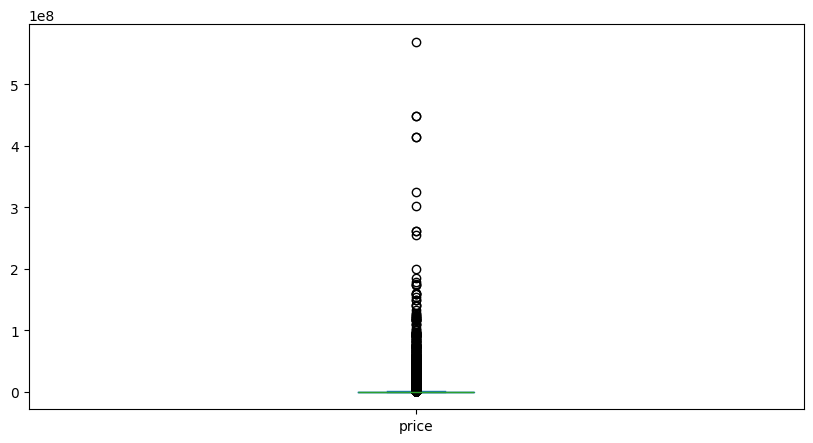

In [149]:
import matplotlib.pyplot as plt

df["price"].plot(kind="box", figsize=(10,5))
plt.show()


# Handle Missing Values

In [152]:
print(df.isna().sum())


transaction_id       0
price                0
date_of_transfer     0
postcode             0
property_type        0
new_build            0
tenure               0
paon                 0
saon                 0
street               0
locality             0
town_city            0
district             0
county               0
ppd_category_type    0
record_status        0
month                0
dtype: int64


In [151]:
# Drop critical missing
# df = df.dropna(subset=["price", "date_of_transfer"])


# Fill non-critical with 'Unknown'
fill_cols = ["saon", "street", "locality", "postcode"]
df[fill_cols] = df[fill_cols].fillna("Unknown")

# Feature Engineering

In [153]:
# Temporal Features

df["year"] = df["date_of_transfer"].dt.year
df["month"] = df["date_of_transfer"].dt.month
df["quarter"] = df["date_of_transfer"].dt.quarter
df["day_of_week"] = df["date_of_transfer"].dt.dayofweek  # 0=Mon


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037301 entries, 0 to 1037300
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   transaction_id     1037301 non-null  object        
 1   price              1037301 non-null  int64         
 2   date_of_transfer   1037301 non-null  datetime64[ns]
 3   postcode           1037301 non-null  object        
 4   property_type      1037301 non-null  object        
 5   new_build          1037301 non-null  object        
 6   tenure             1037301 non-null  object        
 7   paon               1037301 non-null  object        
 8   saon               1037301 non-null  object        
 9   street             1037301 non-null  object        
 10  locality           1037301 non-null  object        
 11  town_city          1037301 non-null  object        
 12  district           1037301 non-null  object        
 13  county             1037301 

In [155]:
# Price Features

import numpy as np

df["log_price"] = np.log1p(df["price"])  # stabilize skew
df["is_luxury"] = (df["price"] > 1000000).astype(int)
df["is_budget"] = (df["price"] < 75000).astype(int)


In [157]:
# Property Category Encoding

# Property type mapping

type_map = {"D": "Detached", "S": "Semi", "T": "Terraced", "F": "Flat", "O": "Other"}
df["property_type"] = df["property_type"].map(type_map)

In [158]:
# Tenure

tenure_map = {"F": "Freehold", "L": "Leasehold"}
df["tenure"] = df["tenure"].map(tenure_map)

In [159]:

# New Build Flag

df["new_build"] = df["new_build"].map({"Y": 1, "N": 0})


In [160]:
# Region Encoding

# Create a combined location string for geospatial analysis
df["full_address"] = (
    df["paon"].astype(str) + " " +
    df["street"].astype(str) + ", " +
    df["town_city"].astype(str) + ", " +
    df["postcode"].astype(str)
)

In [161]:
# Define price categories

def price_category(price):
    if price < 100000:
        return "Affordable (<100k)"
    elif price < 250000:
        return "Lower-Mid (100k-250k)"
    elif price < 500000:
        return "Upper-Mid (250k-500k)"
    elif price < 1000000:
        return "High-End (500k-1M)"
    elif price < 5000000:
        return "Luxury (1M-5M)"
    else:
        return "Ultra-Luxury (5M+)"
    
# Apply function
df["price_category"] = df["price"].apply(price_category)

print(df[["price", "price_category"]].head())


    price         price_category
0  137196  Lower-Mid (100k-250k)
1  229995  Lower-Mid (100k-250k)
2  175000  Lower-Mid (100k-250k)
3  211995  Lower-Mid (100k-250k)
4  194995  Lower-Mid (100k-250k)


In [162]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037301 entries, 0 to 1037300
Data columns (total 25 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   transaction_id     1037301 non-null  object        
 1   price              1037301 non-null  int64         
 2   date_of_transfer   1037301 non-null  datetime64[ns]
 3   postcode           1037301 non-null  object        
 4   property_type      1037301 non-null  object        
 5   new_build          1037301 non-null  int64         
 6   tenure             1037301 non-null  object        
 7   paon               1037301 non-null  object        
 8   saon               1037301 non-null  object        
 9   street             1037301 non-null  object        
 10  locality           1037301 non-null  object        
 11  town_city          1037301 non-null  object        
 12  district           1037301 non-null  object        
 13  county             1037301 

In [165]:
import pandas as pd
import os

# Create folder if it doesn't exist
save_folder = "output"
os.makedirs(save_folder, exist_ok=True)

# Define file path
file_path = os.path.join(save_folder, "HM_Land_registry_2018_refined.csv")

# Save DataFrame to CSV
df.to_csv(file_path, index=False)

print(f"File saved successfully to {file_path}")

File saved successfully to output\HM_Land_registry_2018_refined.csv


In [138]:
df.head()


,transaction_id,price,date_of_transfer,postcode,property_type,new_build,tenure,paon,saon,street,...,year,quarter,day_of_week,log_price,is_luxury,is_budget,full_address,price_band,month_num,price_category
0,{75050A85-7FB9-9A88-E053-6B04A8C02390},137196,2018-05-25,LE12 6XT,Semi,1,Freehold,29,Unknown,PEACOCK GARDENS,...,2018,2018Q2,4,11.829173,0,0,"29 PEACOCK GARDENS, LOUGHBOROUGH, LE12 6XT",100k-250k,5,Lower-Mid (100k-250k)
1,{75050A85-7FBA-9A88-E053-6B04A8C02390},229995,2018-06-29,NG21 9GT,Detached,1,Freehold,7,Unknown,CHAFFINCH CLOSE,...,2018,2018Q2,4,12.345817,0,0,"7 CHAFFINCH CLOSE, MANSFIELD, NG21 9GT",100k-250k,6,Lower-Mid (100k-250k)
2,{75050A85-7FBB-9A88-E053-6B04A8C02390},175000,2018-07-06,NG19 7EW,Detached,0,Freehold,18A,Unknown,BEECH HILL CRESCENT,...,2018,2018Q3,4,12.072547,0,0,"18A BEECH HILL CRESCENT, MANSFIELD, NG19 7EW",100k-250k,7,Lower-Mid (100k-250k)
3,{75050A85-7FBC-9A88-E053-6B04A8C02390},211995,2018-06-28,S81 7TB,Semi,1,Freehold,2,Unknown,RED ADMIRAL ROAD,...,2018,2018Q2,3,12.264323,0,0,"2 RED ADMIRAL ROAD, WORKSOP, S81 7TB",100k-250k,6,Lower-Mid (100k-250k)
4,{75050A85-7FBE-9A88-E053-6B04A8C02390},194995,2018-06-29,LE12 6XT,Terraced,1,Freehold,15,Unknown,PEACOCK GARDENS,...,2018,2018Q2,4,12.180734,0,0,"15 PEACOCK GARDENS, LOUGHBOROUGH, LE12 6XT",100k-250k,6,Lower-Mid (100k-250k)


In [166]:
df["price"].describe().apply(lambda x: f"{x:,.0f}")


count      1,037,301
mean         351,726
std        1,850,852
min              100
25%          145,000
50%          230,000
75%          355,000
max      569,200,000
Name: price, dtype: object

# Deep Analysis

In [170]:
import pandas as pd
import glob

# Path to your folder (adjust accordingly)
path = "\output"
all_files = glob.glob(path + "/*.csv")

# Load and concatenate
df_list = [pd.read_csv(file, header=None) for file in all_files]
# df = pd.concat(df_list, ignore_index=True)

<>:5: SyntaxWarning: invalid escape sequence '\o'
<>:5: SyntaxWarning: invalid escape sequence '\o'
C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\1702712834.py:5: SyntaxWarning: invalid escape sequence '\o'
  path = "\output"


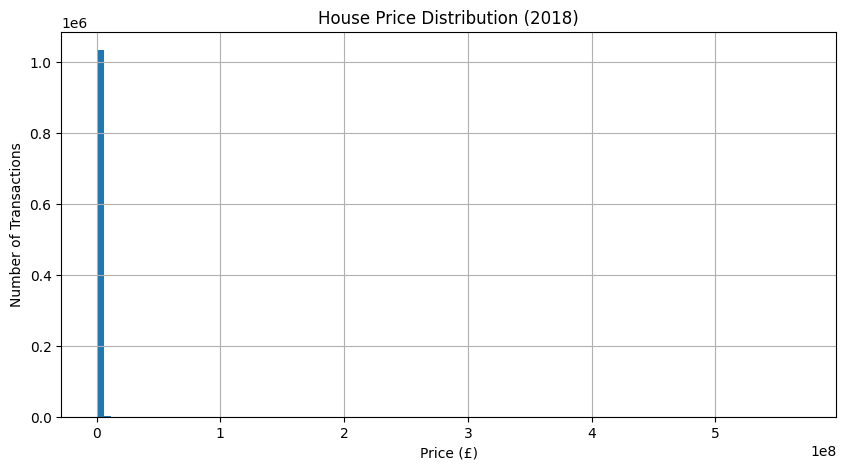

In [173]:
# Distribution Check

import matplotlib.pyplot as plt

df["price"].hist(bins=100, figsize=(10,5))
plt.title("House Price Distribution (2018)")
plt.xlabel("Price (£)")
plt.ylabel("Number of Transactions")
plt.show()


In [23]:
# Outlier Identification

outliers_low = df[df["price"] < 10000]
outliers_high = df[df["price"] > 10000000]


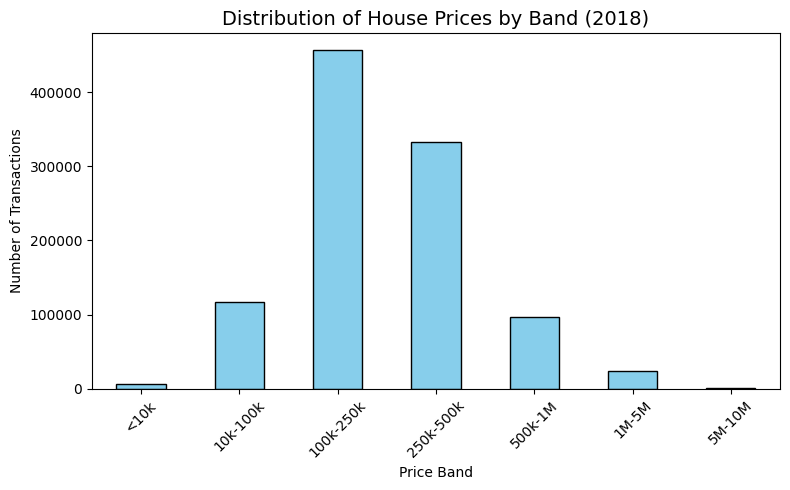

In [31]:
# Price Segmentation

import matplotlib.pyplot as plt
import pandas as pd

# Define price bands
df["price_band"] = pd.cut(
    df["price"],
    bins=[0, 10000, 100000, 250000, 500000, 1000000, 5000000, 10000000],
    labels=["<10k","10k-100k","100k-250k","250k-500k","500k-1M","1M-5M","5M-10M"]
)

# Count per band
band_counts = df["price_band"].value_counts().sort_index()

# Plot
band_counts.plot(kind="bar", figsize=(8,5), color="skyblue", edgecolor="black")

plt.title("Distribution of House Prices by Band (2018)", fontsize=14)
plt.xlabel("Price Band")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [25]:
# Skewness & Transformation

print("Skewness:", df["price"].skew())

Skewness: 119.91380858198399


Skewness: 119.91380858198399


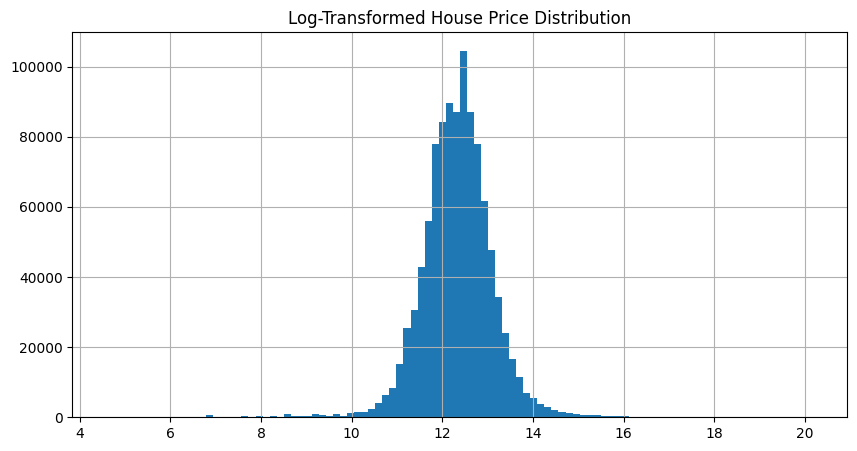

In [ ]:
print("Skewness:", df["price"].skew())

# Log transform for Statistical Analysis and ML Models
 
df["log_price"] = np.log1p(df["price"])
df["log_price"].hist(bins=100, figsize=(10,5))
plt.title("Log-Transformed House Price Distribution")
plt.show()


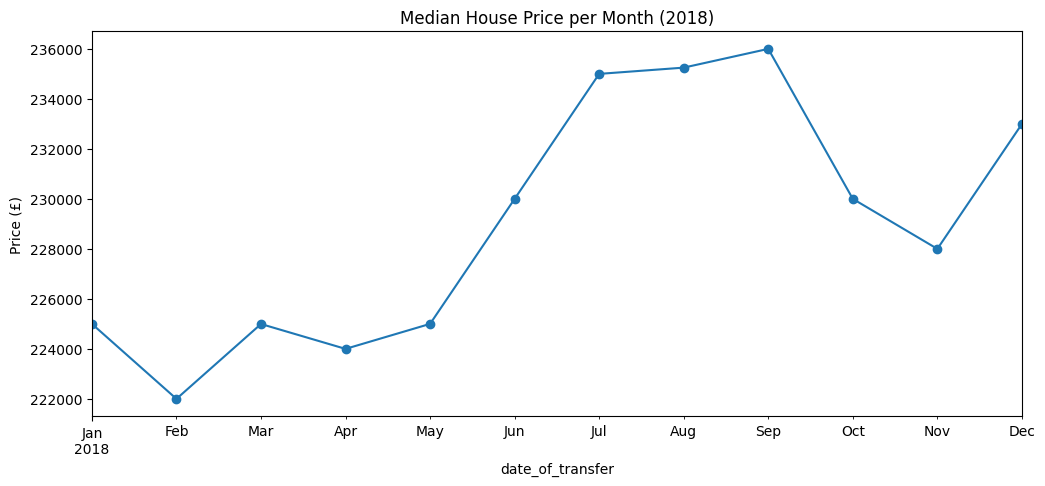

In [29]:
# Temporal Price Trends

monthly_price = df.groupby(df["date_of_transfer"].dt.to_period("M"))["price"].median()
monthly_price.plot(figsize=(12,5), marker="o")
plt.title("Median House Price per Month (2018)")
plt.ylabel("Price (£)")
plt.show()


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [33]:
# --- Ensure datetime ---
df["date_of_transfer"] = pd.to_datetime(df["date_of_transfer"], errors="coerce")

In [34]:
# --- Monthly average prices ---
df["month"] = df["date_of_transfer"].dt.to_period("M")
monthly_avg = df.groupby("month")["price"].mean().reset_index()
monthly_avg["month"] = monthly_avg["month"].dt.to_timestamp()

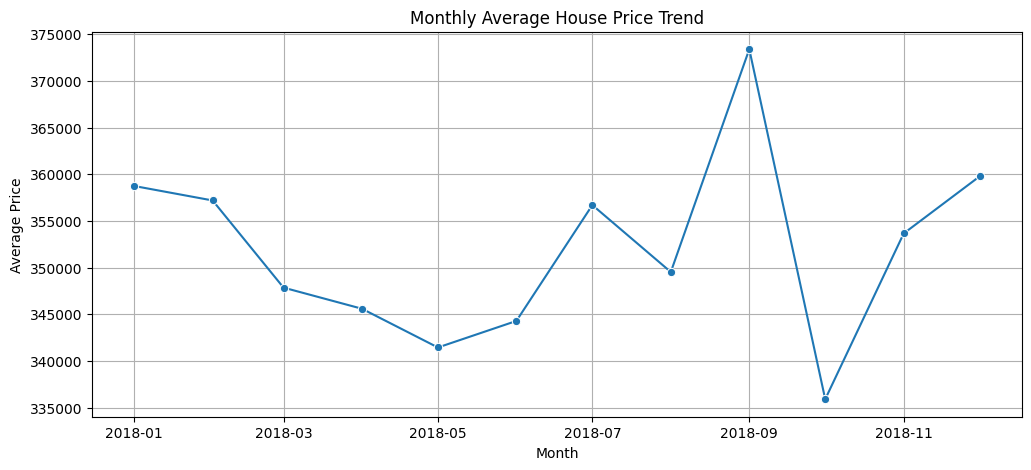

In [35]:
# --- Plot monthly average trend ---
plt.figure(figsize=(12,5))
sns.lineplot(data=monthly_avg, x="month", y="price", marker="o")
plt.title("Monthly Average House Price Trend")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\4028623508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=month_seasonality, x="month_num", y="price", palette="viridis")


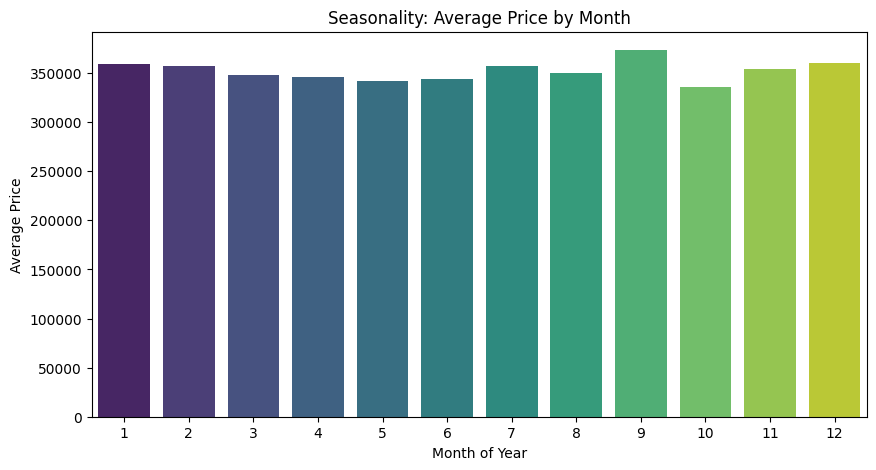

In [37]:
# --- Seasonality by month of year ---
df["month_num"] = df["date_of_transfer"].dt.month
month_seasonality = df.groupby("month_num")["price"].mean().reset_index()

plt.figure(figsize=(10,5))
sns.barplot(data=month_seasonality, x="month_num", y="price", palette="viridis")
plt.title("Seasonality: Average Price by Month")
plt.xlabel("Month of Year")
plt.ylabel("Average Price")
plt.show()

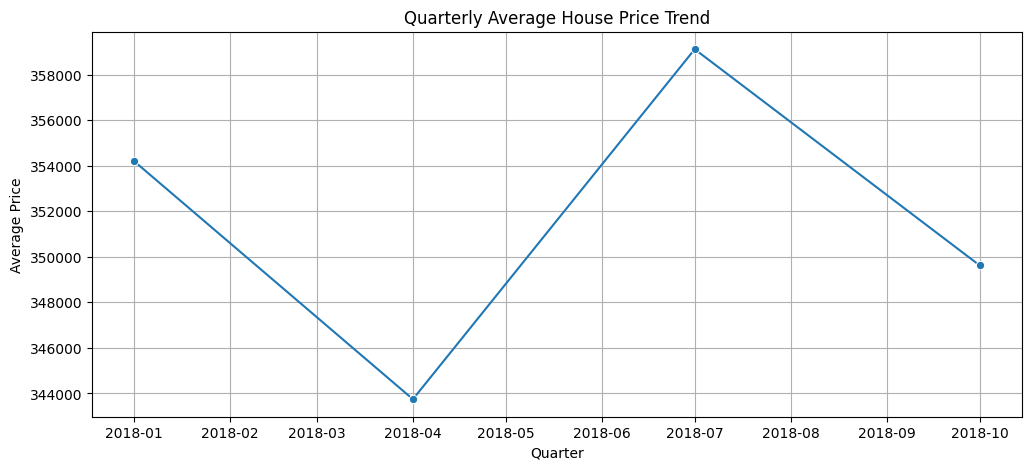

In [38]:
# --- Quarterly analysis ---
df["quarter"] = df["date_of_transfer"].dt.to_period("Q")
quarterly_avg = df.groupby("quarter")["price"].mean().reset_index()
quarterly_avg["quarter"] = quarterly_avg["quarter"].dt.to_timestamp()

plt.figure(figsize=(12,5))
sns.lineplot(data=quarterly_avg, x="quarter", y="price", marker="o")
plt.title("Quarterly Average House Price Trend")
plt.xlabel("Quarter")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()

# Regional Disparities

In [40]:
# --- Check what region column exists (example: 'region', 'district', 'county') ---
print(df.columns)

Index(['transaction_id', 'price', 'date_of_transfer', 'postcode',
       'property_type', 'new_build', 'tenure', 'paon', 'saon', 'street',
       'locality', 'town_city', 'district', 'county', 'ppd_category_type',
       'record_status', 'month', 'year', 'quarter', 'day_of_week', 'log_price',
       'is_luxury', 'is_budget', 'full_address', 'price_band', 'month_num'],
      dtype='object')


In [47]:
# --- Find top 20 regions by sales volume ---
top20_regions = df["district"].value_counts().nlargest(20).index
df_top20 = df[df["district"].isin(top20_regions)].copy()

C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\2099107913.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_stats.sort_values("mean", ascending=False),


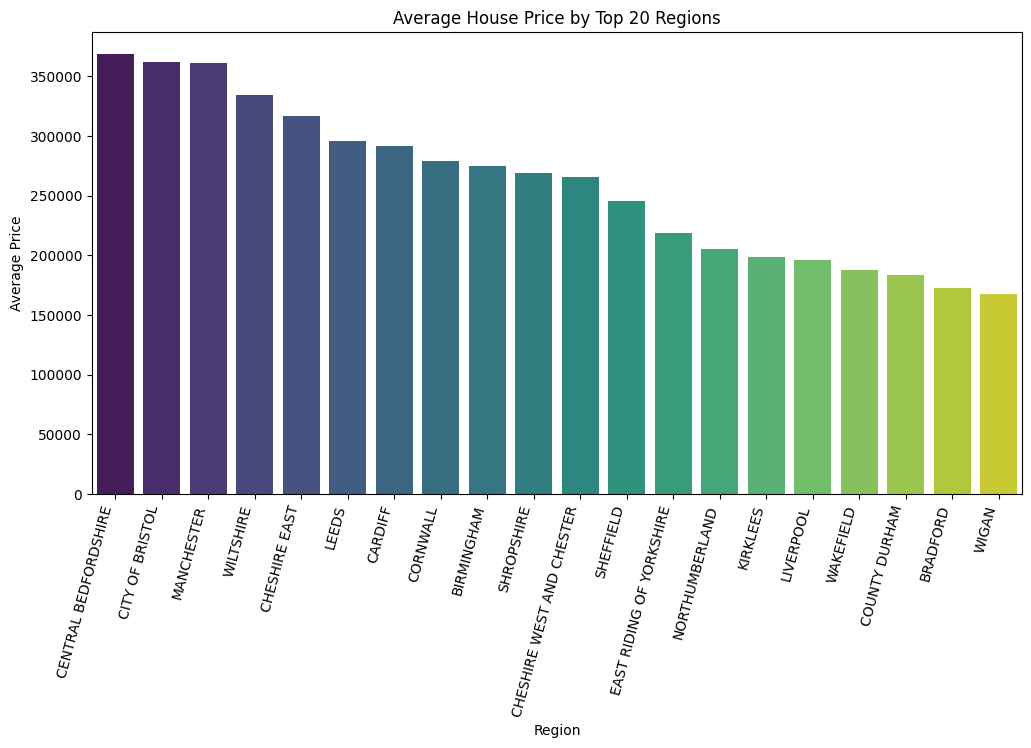

In [48]:
# --- Regional average prices (top 20) ---
regional_stats = df_top20.groupby("district")["price"].agg(["mean", "median", "count"]).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=regional_stats.sort_values("mean", ascending=False),
            x="district", y="mean", palette="viridis")
plt.xticks(rotation=75, ha="right")
plt.title("Average House Price by Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.show()

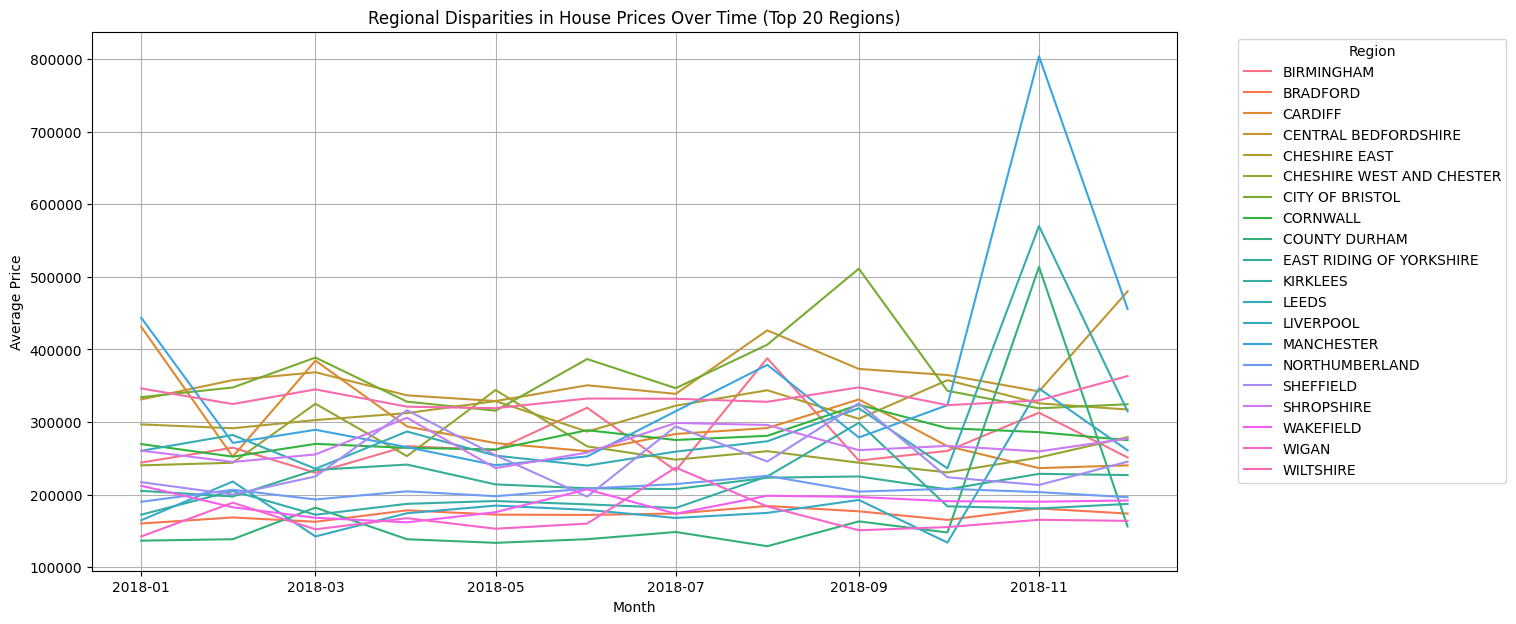

In [50]:
# --- Regional disparity over time (top 20) ---
df_top20["month"] = df_top20["date_of_transfer"].dt.to_period("M")
regional_monthly = df_top20.groupby(["month", "district"])["price"].mean().reset_index()
regional_monthly["month"] = regional_monthly["month"].dt.to_timestamp()

plt.figure(figsize=(14,7))
sns.lineplot(data=regional_monthly, x="month", y="price", hue="district")
plt.title("Regional Disparities in House Prices Over Time (Top 20 Regions)")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

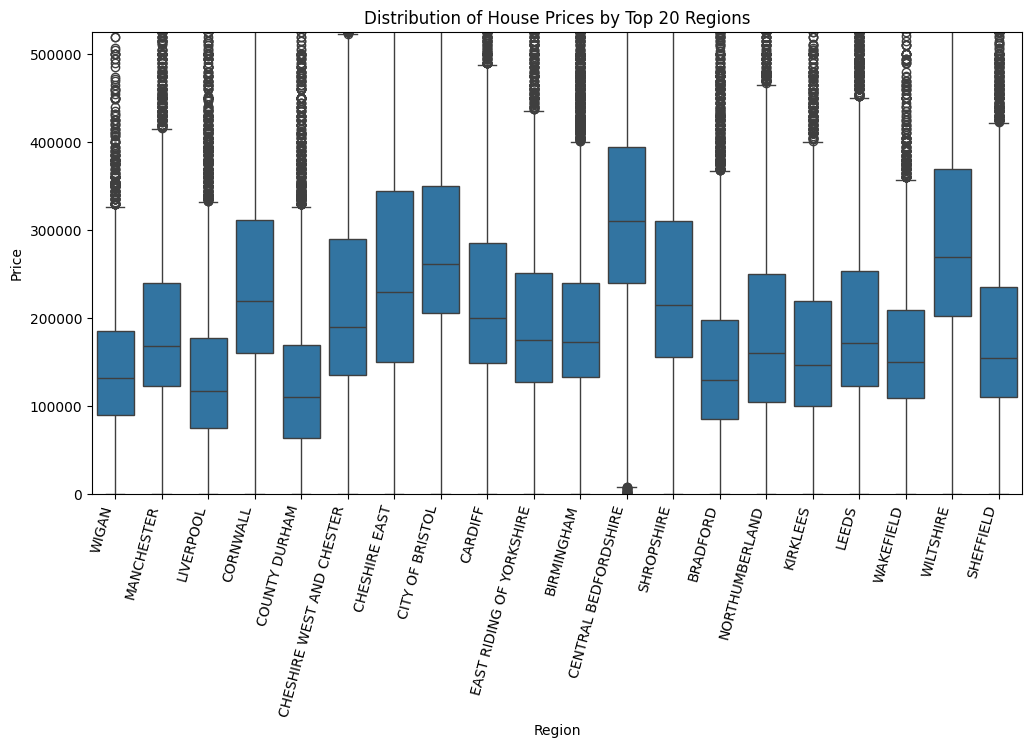

In [51]:
# --- Spread analysis (boxplot for top 20) ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top20, x="district", y="price")
plt.xticks(rotation=75, ha="right")
plt.title("Distribution of House Prices by Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Price")
plt.ylim(0, df_top20["price"].quantile(0.95))  # limit outliers
plt.show()

In [52]:
# --- Find top 20 regions by sales volume ---
top20_regions = df["county"].value_counts().nlargest(20).index
df_top20 = df[df["county"].isin(top20_regions)].copy()

C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\1317493625.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_stats.sort_values("mean", ascending=False),


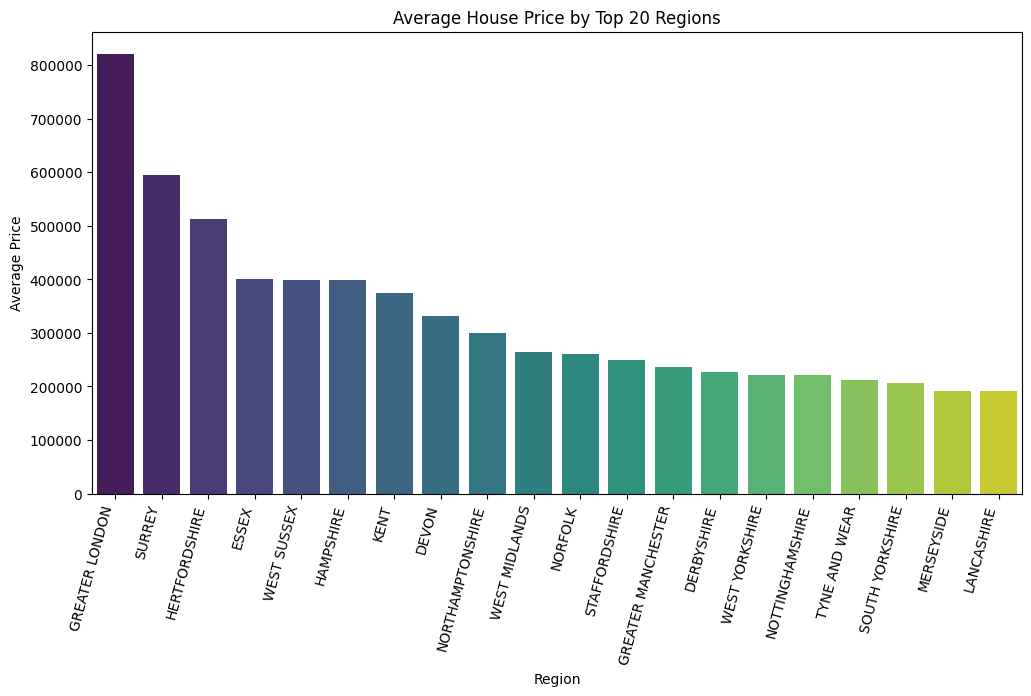

In [55]:
# --- Regional average prices (top 20) ---
regional_stats = df_top20.groupby("county")["price"].agg(["mean", "median", "count"]).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=regional_stats.sort_values("mean", ascending=False),
            x="county", y="mean", palette="viridis")
plt.xticks(rotation=75, ha="right")
plt.title("Average House Price by Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.show()

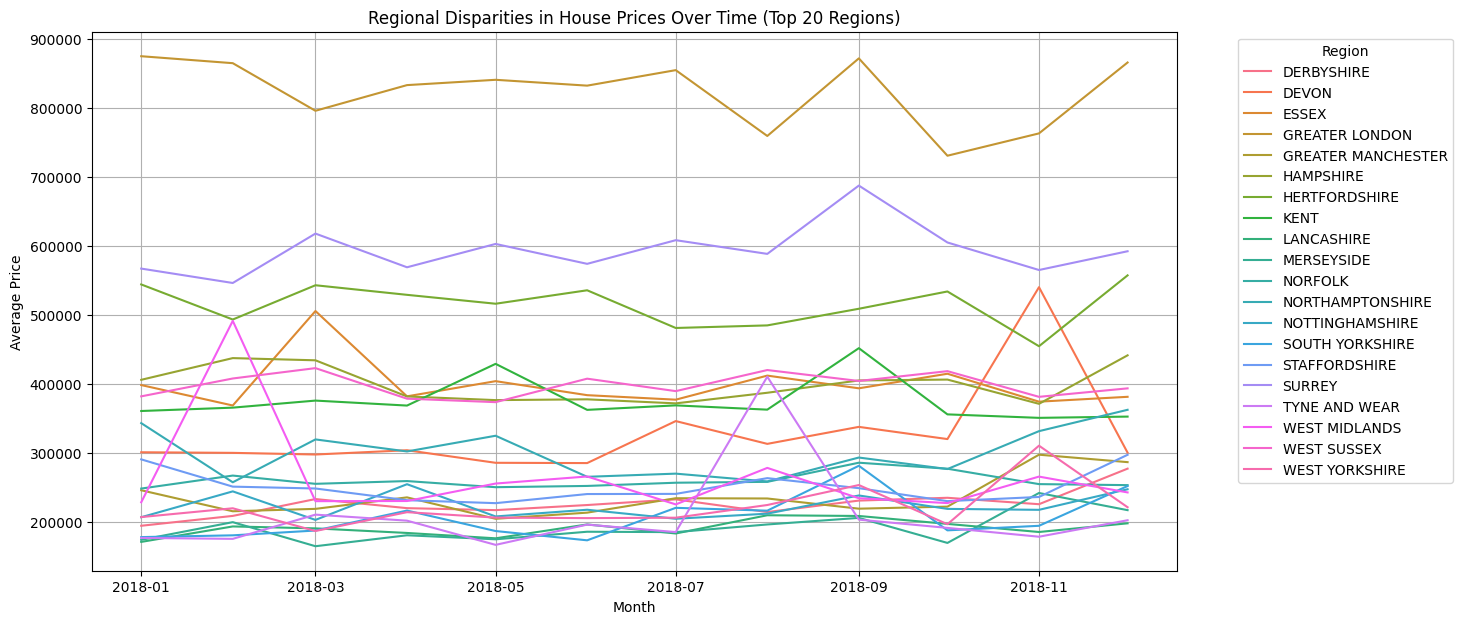

In [56]:
# --- Regional disparity over time (top 20) ---
df_top20["month"] = df_top20["date_of_transfer"].dt.to_period("M")
regional_monthly = df_top20.groupby(["month", "county"])["price"].mean().reset_index()
regional_monthly["month"] = regional_monthly["month"].dt.to_timestamp()

plt.figure(figsize=(14,7))
sns.lineplot(data=regional_monthly, x="month", y="price", hue="county")
plt.title("Regional Disparities in House Prices Over Time (Top 20 Regions)")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

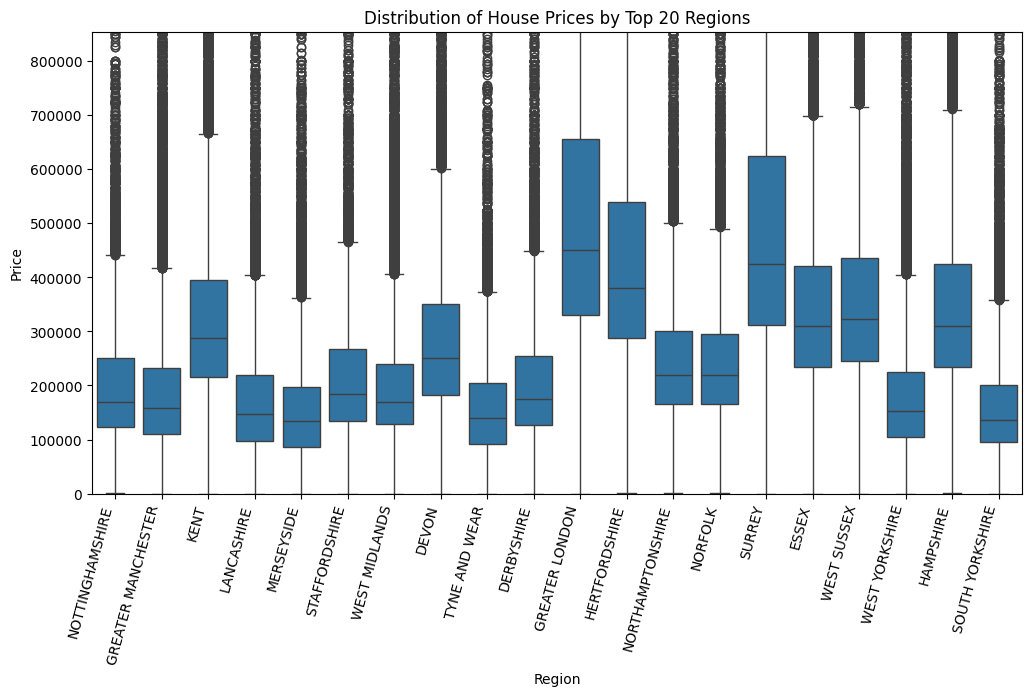

In [57]:
# --- Spread analysis (boxplot for top 20) ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top20, x="county", y="price")
plt.xticks(rotation=75, ha="right")
plt.title("Distribution of House Prices by Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Price")
plt.ylim(0, df_top20["price"].quantile(0.95))  # limit outliers
plt.show()

In [132]:
# --- Find top 20 regions by sales volume ---
top20_regions = df["town_city"].value_counts().nlargest(20).index
df_top20 = df[df["town_city"].isin(top20_regions)].copy()

C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\361150976.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_stats.sort_values("mean", ascending=False),


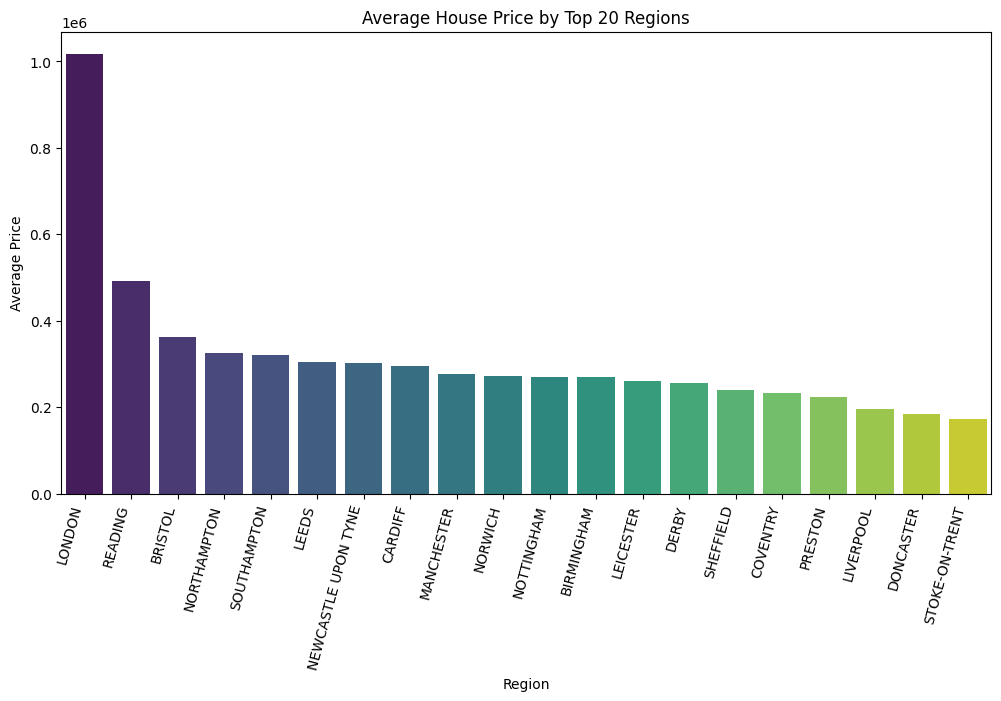

In [133]:
# --- Regional average prices (top 20) ---
regional_stats = df_top20.groupby("town_city")["price"].agg(["mean", "median", "count"]).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=regional_stats.sort_values("mean", ascending=False),
            x="town_city", y="mean", palette="viridis")
plt.xticks(rotation=75, ha="right")
plt.title("Average House Price by Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Average Price")
plt.show()

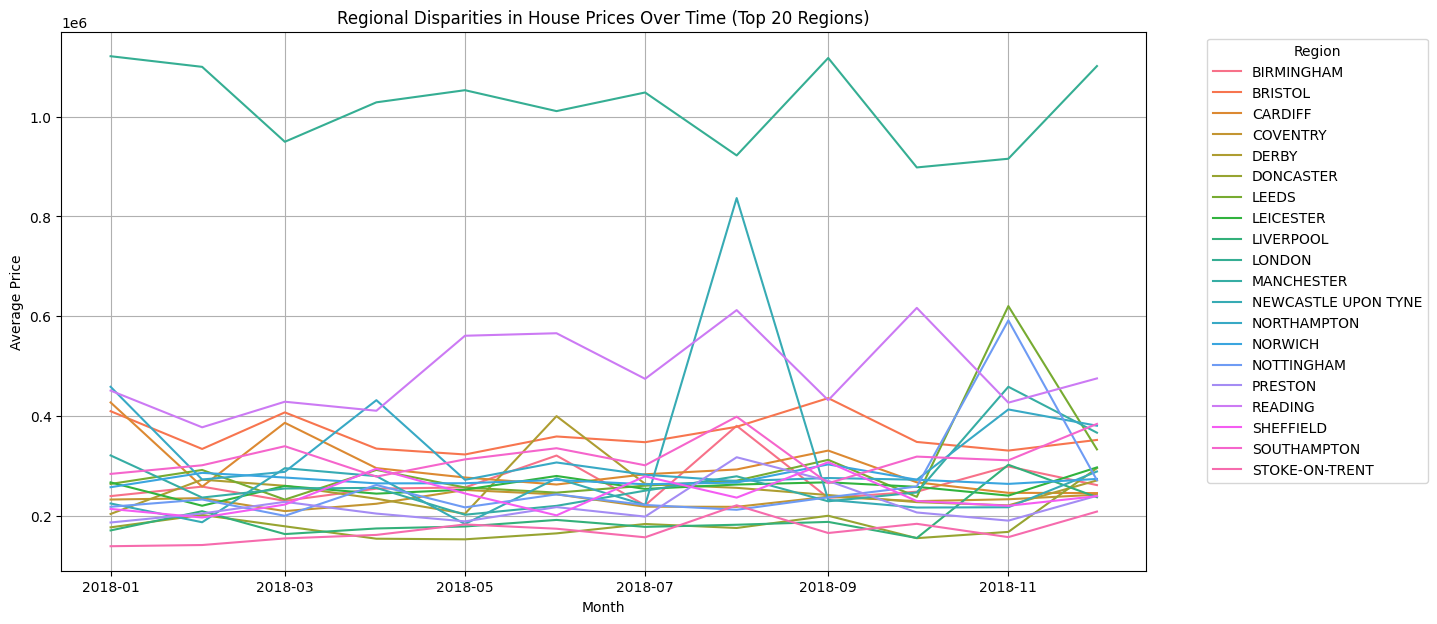

In [134]:
# --- Regional disparity over time (top 20) ---
df_top20["month"] = df_top20["date_of_transfer"].dt.to_period("M")
regional_monthly = df_top20.groupby(["month", "town_city"])["price"].mean().reset_index()
regional_monthly["month"] = regional_monthly["month"].dt.to_timestamp()

plt.figure(figsize=(14,7))
sns.lineplot(data=regional_monthly, x="month", y="price", hue="town_city")
plt.title("Regional Disparities in House Prices Over Time (Top 20 Regions)")
plt.xlabel("Month")
plt.ylabel("Average Price")
plt.legend(title="Region", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

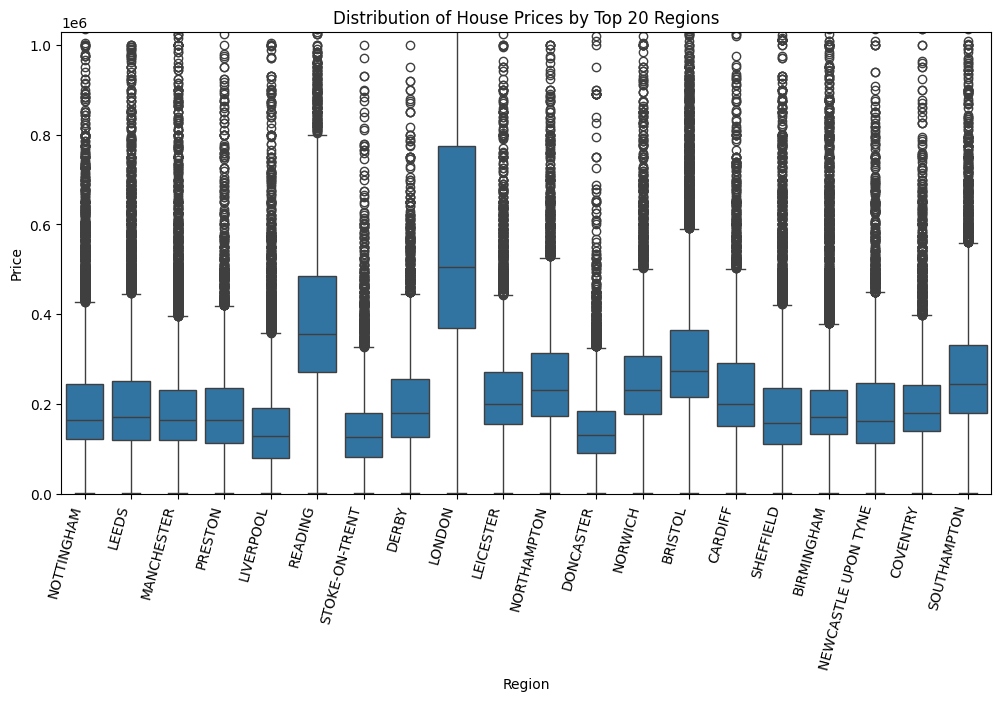

In [135]:
# --- Spread analysis (boxplot for top 20) ---
plt.figure(figsize=(12,6))
sns.boxplot(data=df_top20, x="town_city", y="price")
plt.xticks(rotation=75, ha="right")
plt.title("Distribution of House Prices by Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Price")
plt.ylim(0, df_top20["price"].quantile(0.95))  # limit outliers
plt.show()

# Analyzing Luxury market → Transactions > £1M.

In [61]:
# --- Filter luxury market: Transactions > £1M ---
luxury_df = df[df["price"] > 1_000_000].copy()


print(f"Luxury transactions count: {len(luxury_df)}")
print(luxury_df.head())

Luxury transactions count: 27487
                             transaction_id     price date_of_transfer  \
522  {7C2D0701-0266-4963-E053-6B04A8C07B97}   1750000       2018-10-31   
527  {7C2D0701-026B-4963-E053-6B04A8C07B97}   1425000       2018-11-23   
545  {7C2D0701-0493-4963-E053-6B04A8C07B97}  17487152       2018-09-13   
564  {7C2D0701-04A6-4963-E053-6B04A8C07B97}   3896787       2018-10-26   
565  {7C2D0701-04A8-4963-E053-6B04A8C07B97}   1320000       2018-11-02   

     postcode property_type  new_build    tenure                   paon  \
522  CA11 7SU         Other          0  Freehold           GEORGE HOTEL   
527  LA23 3LF         Other          0  Freehold       GARDEN HILL WEST   
545   PL1 1UH         Other          0  Freehold                27 - 31   
564   TQ2 6RQ         Other          0  Freehold  LIVERMEAD CLIFF HOTEL   
565  TQ12 3GX         Other          0  Freehold             WELL HOUSE   

        saon             street  ...    month  year quarter day_of_week

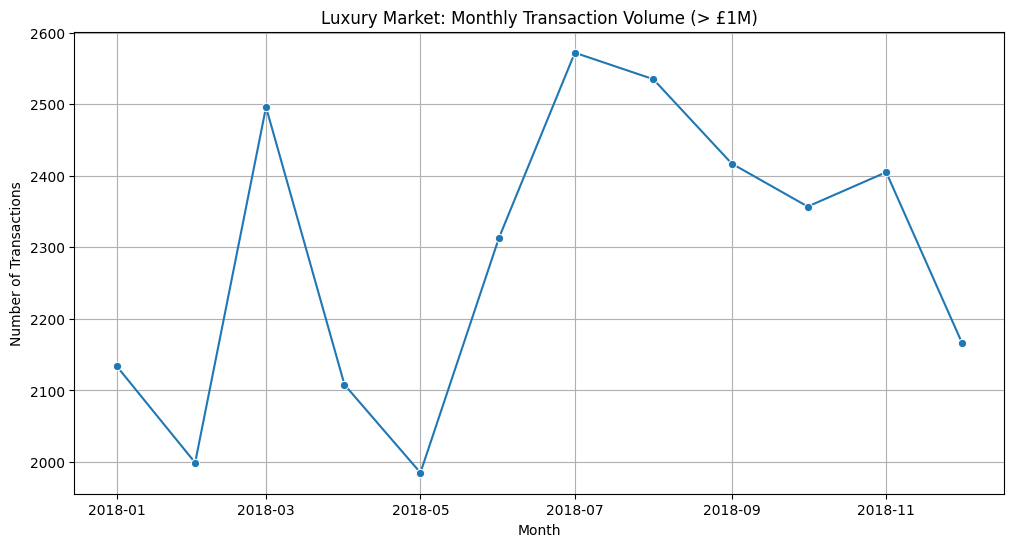

In [62]:
# --- Trend over time ---
luxury_df["month"] = luxury_df["date_of_transfer"].dt.to_period("M")
luxury_monthly = luxury_df.groupby("month")["price"].agg(["count", "mean", "median"]).reset_index()
luxury_monthly["month"] = luxury_monthly["month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=luxury_monthly, x="month", y="count", marker="o")
plt.title("Luxury Market: Monthly Transaction Volume (> £1M)")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.grid(True)
plt.show()


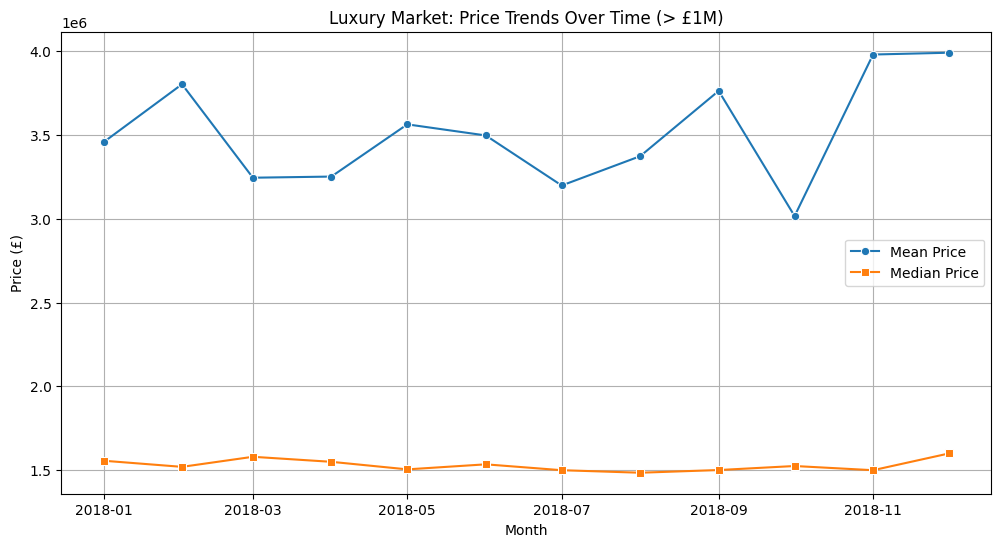

In [63]:
# --- Price trends in luxury segment ---
plt.figure(figsize=(12,6))
sns.lineplot(data=luxury_monthly, x="month", y="mean", label="Mean Price", marker="o")
sns.lineplot(data=luxury_monthly, x="month", y="median", label="Median Price", marker="s")
plt.title("Luxury Market: Price Trends Over Time (> £1M)")
plt.xlabel("Month")
plt.ylabel("Price (£)")
plt.legend()
plt.grid(True)
plt.show()


C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\3025278606.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=luxury_region, x="district", y="count", palette="magma")


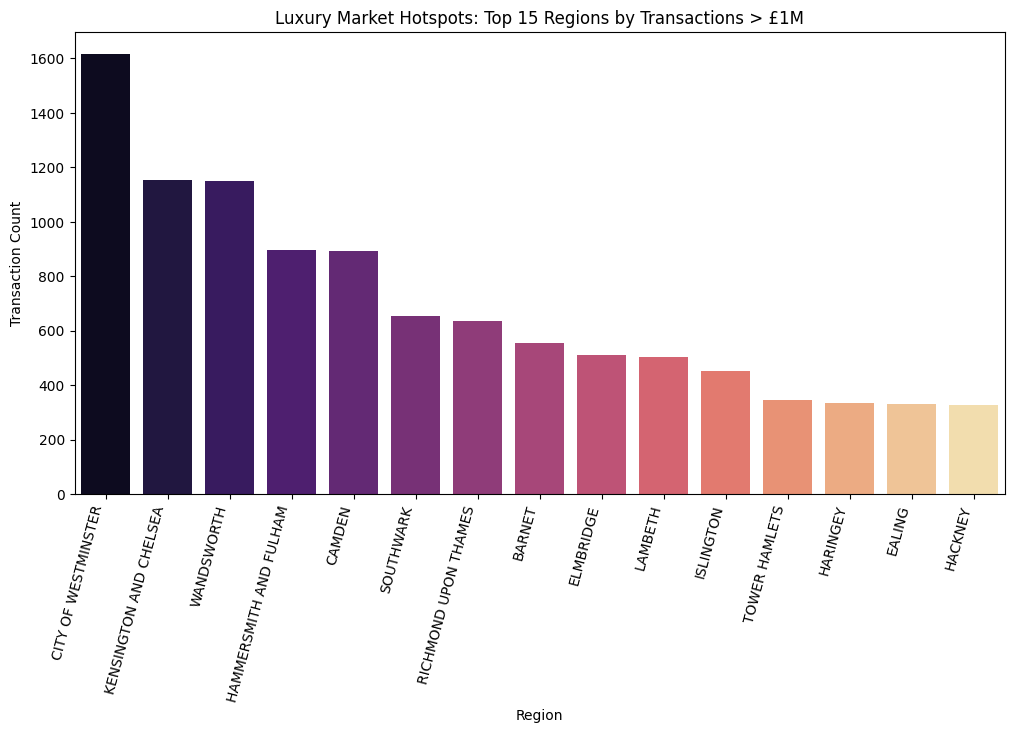

In [65]:
# --- Regional luxury hotspots ---
luxury_region = luxury_df.groupby("district")["price"].agg(["count", "mean", "median"]).reset_index()
luxury_region = luxury_region.sort_values("count", ascending=False).head(15)  # top 15 regions

plt.figure(figsize=(12,6))
sns.barplot(data=luxury_region, x="district", y="count", palette="magma")
plt.xticks(rotation=75, ha="right")
plt.title("Luxury Market Hotspots: Top 15 Regions by Transactions > £1M")
plt.xlabel("Region")
plt.ylabel("Transaction Count")
plt.show()


C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\2406391010.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=luxury_region, x="county", y="count", palette="magma")


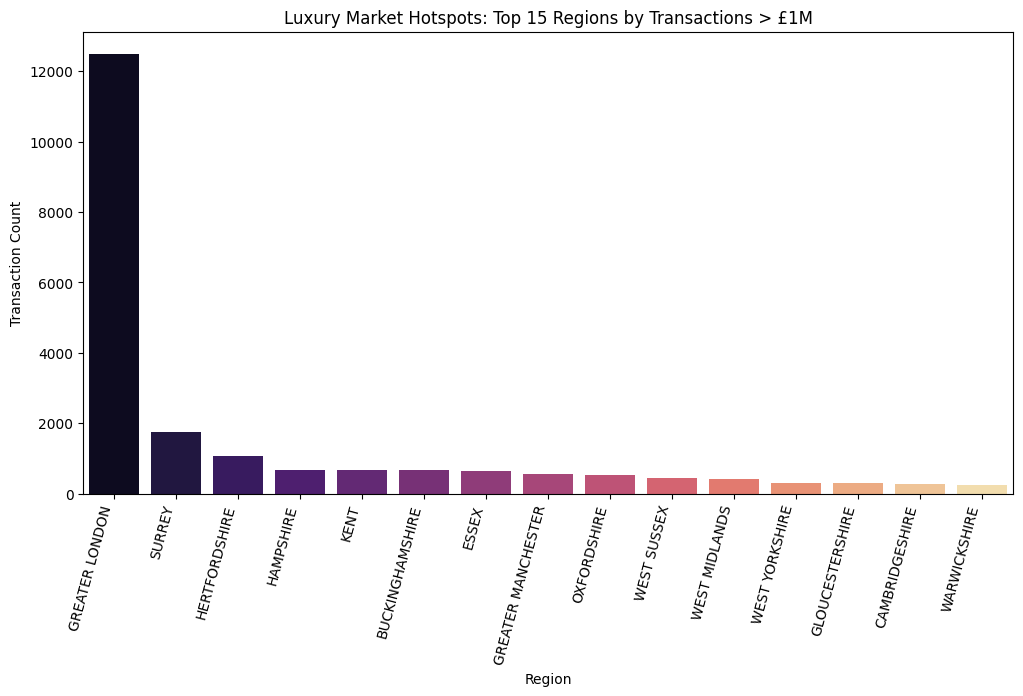

In [66]:
# --- Regional luxury hotspots ---
luxury_region = luxury_df.groupby("county")["price"].agg(["count", "mean", "median"]).reset_index()
luxury_region = luxury_region.sort_values("count", ascending=False).head(15)  # top 15 regions

plt.figure(figsize=(12,6))
sns.barplot(data=luxury_region, x="county", y="count", palette="magma")
plt.xticks(rotation=75, ha="right")
plt.title("Luxury Market Hotspots: Top 15 Regions by Transactions > £1M")
plt.xlabel("Region")
plt.ylabel("Transaction Count")
plt.show()


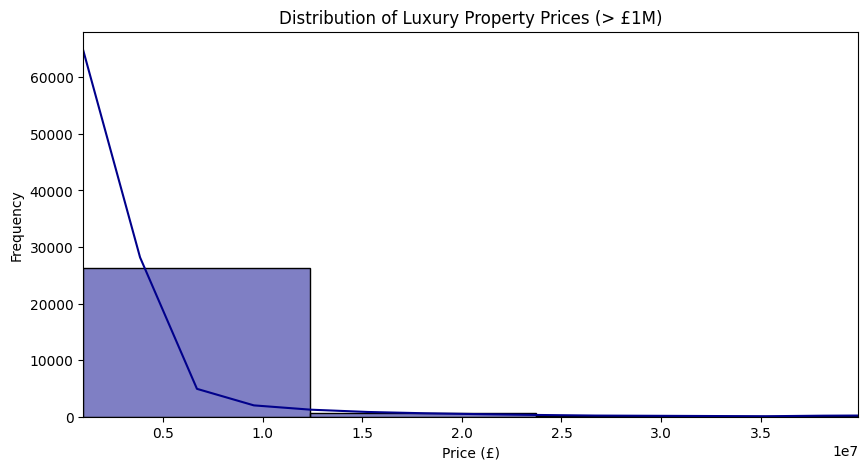

In [67]:
# --- Distribution of luxury prices ---
plt.figure(figsize=(10,5))
sns.histplot(luxury_df["price"], bins=50, kde=True, color="darkblue")
plt.title("Distribution of Luxury Property Prices (> £1M)")
plt.xlabel("Price (£)")
plt.ylabel("Frequency")
plt.xlim(1_000_000, luxury_df["price"].quantile(0.99))  # trim extreme outliers
plt.show()

In [68]:
# --- Monthly overall market ---
df["month"] = df["date_of_transfer"].dt.to_period("M")
overall_monthly = df.groupby("month")["price"].agg(["count", "sum"]).reset_index()
overall_monthly["month"] = overall_monthly["month"].dt.to_timestamp()

In [69]:
# --- Monthly luxury market ---
luxury_df["month"] = luxury_df["date_of_transfer"].dt.to_period("M")
luxury_monthly = luxury_df.groupby("month")["price"].agg(["count", "sum"]).reset_index()
luxury_monthly["month"] = luxury_monthly["month"].dt.to_timestamp()

In [70]:
# --- Merge for comparison ---
comparison = pd.merge(overall_monthly, luxury_monthly, on="month", how="left", suffixes=("_overall", "_luxury"))
comparison = comparison.fillna(0)

In [72]:
# --- Compute luxury share ---
comparison["luxury_share_transactions"] = (comparison["count_luxury"] / comparison["count_overall"]) * 100
comparison["luxury_share_value"] = (comparison["sum_luxury"] / comparison["sum_overall"]) * 100

print(comparison.head())

       month  count_overall  sum_overall  count_luxury  sum_luxury  \
0 2018-01-01          70579  25319971283          2134  7374839141   
1 2018-02-01          72130  25764578394          1999  7599104033   
2 2018-03-01          84961  29554888372          2496  8097265041   
3 2018-04-01          73003  25229914811          2108  6852864005   
4 2018-05-01          82249  28084208231          1985  7071042964   

   luxury_share_transactions  luxury_share_value  
0                   3.023562           29.126570  
1                   2.771385           29.494385  
2                   2.937819           27.397380  
3                   2.887553           27.161661  
4                   2.413403           25.178004  


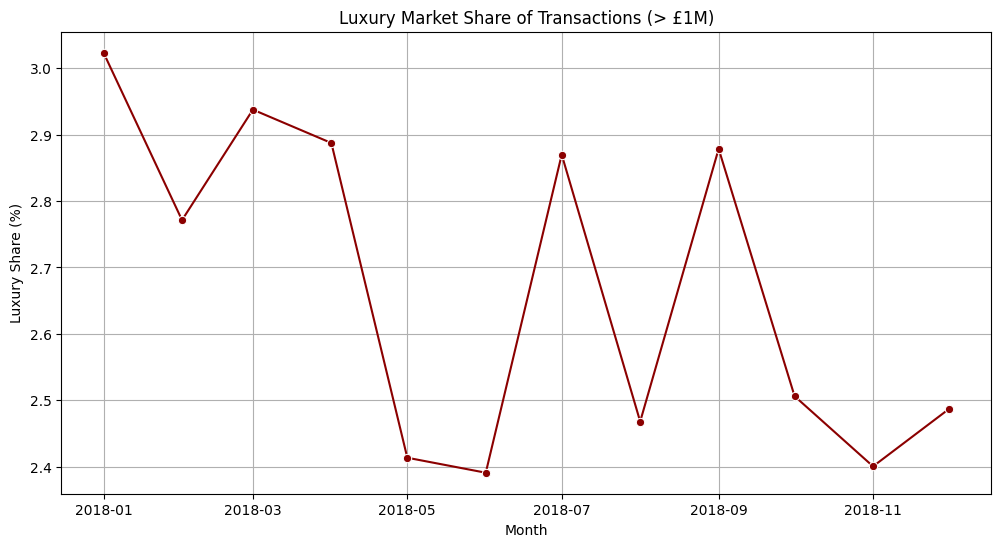

In [73]:
# --- Plot luxury share of transactions ---
plt.figure(figsize=(12,6))
sns.lineplot(data=comparison, x="month", y="luxury_share_transactions", marker="o", color="darkred")
plt.title("Luxury Market Share of Transactions (> £1M)")
plt.xlabel("Month")
plt.ylabel("Luxury Share (%)")
plt.grid(True)
plt.show()

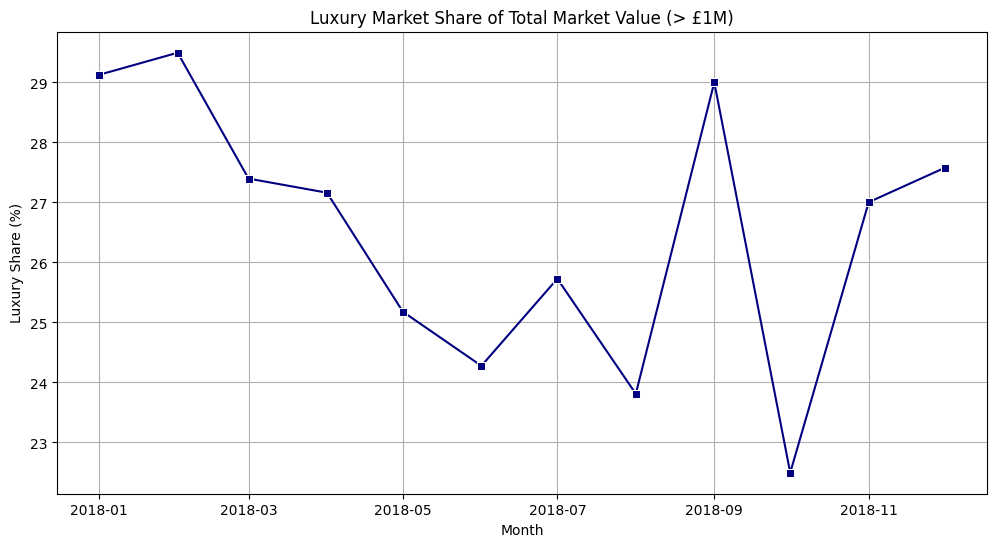

In [74]:
# --- Plot luxury share of total market value ---
plt.figure(figsize=(12,6))
sns.lineplot(data=comparison, x="month", y="luxury_share_value", marker="s", color="navy")
plt.title("Luxury Market Share of Total Market Value (> £1M)")
plt.xlabel("Month")
plt.ylabel("Luxury Share (%)")
plt.grid(True)
plt.show()


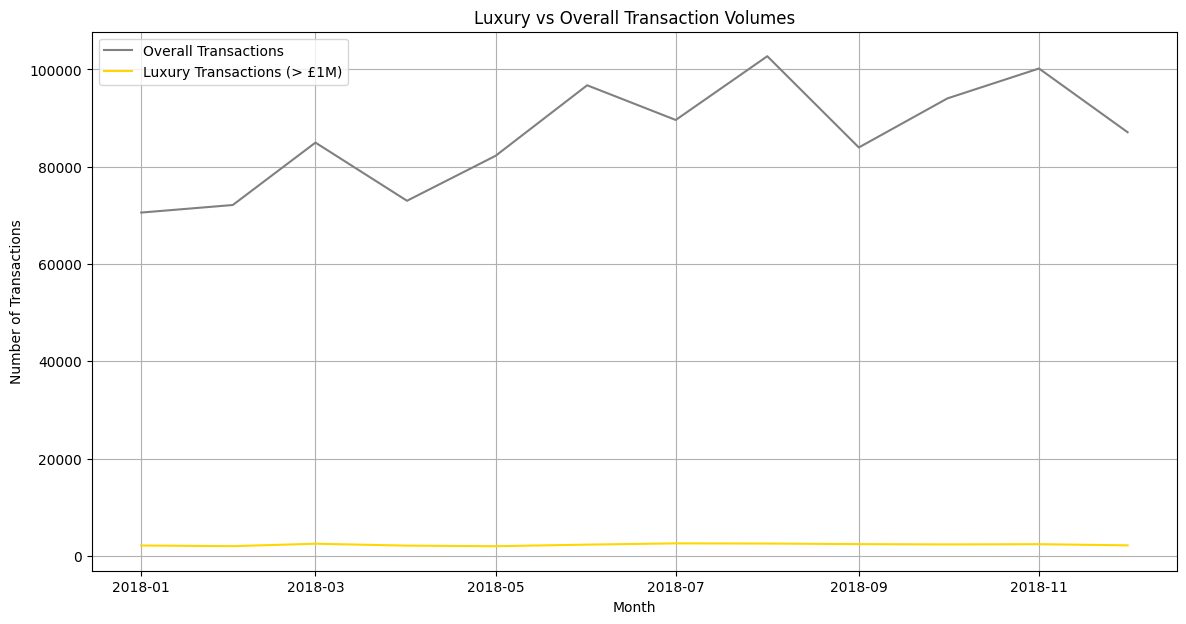

In [75]:
# --- Side by side: transaction counts ---
plt.figure(figsize=(14,7))
sns.lineplot(data=comparison, x="month", y="count_overall", label="Overall Transactions", color="grey")
sns.lineplot(data=comparison, x="month", y="count_luxury", label="Luxury Transactions (> £1M)", color="gold")
plt.title("Luxury vs Overall Transaction Volumes")
plt.xlabel("Month")
plt.ylabel("Number of Transactions")
plt.legend()
plt.grid(True)
plt.show()

What this gives you:

📈 Luxury share of transactions (%) → Are more buyers spending >£1M?

💰 Luxury share of total market value (%) → How much money is tied up in the luxury segment.

🔄 Side-by-side comparison of luxury vs overall transaction counts.

# Regional luxury share analysis

In [91]:
# --- Top 20 regions by overall sales count ---
top20_regions = df["county"].value_counts().nlargest(20).index
df_top20 = df[df["county"].isin(top20_regions)].copy()
luxury_top20 = luxury_df[luxury_df["county"].isin(top20_regions)].copy()

In [92]:
# --- Regional counts (overall vs luxury) ---
regional_overall = df_top20.groupby("county")["price"].agg(count_overall="count", sum_overall="sum").reset_index()
regional_luxury = luxury_top20.groupby("county")["price"].agg(count_luxury="count", sum_luxury="sum").reset_index()

In [94]:
# --- Merge ---
regional_comparison = pd.merge(regional_overall, regional_luxury, on="county", how="left").fillna(0)

In [95]:
# --- Compute luxury share ---
regional_comparison["luxury_share_transactions"] = (regional_comparison["count_luxury"] / regional_comparison["count_overall"]) * 100
regional_comparison["luxury_share_value"] = (regional_comparison["sum_luxury"] / regional_comparison["sum_overall"]) * 100

In [97]:
# --- Sort by luxury transaction share ---
regional_comparison = regional_comparison.sort_values("luxury_share_transactions", ascending=False)
print(regional_comparison.head(10))

                county  count_overall  sum_overall  count_luxury   sum_luxury  \
3       GREATER LONDON         111142  91291391446         12499  46831063284   
15              SURREY          20149  11986671706          1745   3907022411   
6        HERTFORDSHIRE          18561   9524714787          1055   2377820131   
5            HAMPSHIRE          25621  10209642761           667   1706424836   
18         WEST SUSSEX          17076   6818509508           438   1020826811   
2                ESSEX          27482  10999650598           651   1958265266   
7                 KENT          29465  11049303968           665   1926781233   
1                DEVON          17774   5889796559           251    932444556   
4   GREATER MANCHESTER          49212  11614565539           565   2510912927   
11    NORTHAMPTONSHIRE          16055   4810586376           160    910598516   

    luxury_share_transactions  luxury_share_value  
3                   11.245974           51.298444  
15  

C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\2199523317.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_comparison, x="county", y="luxury_share_transactions", palette="magma")


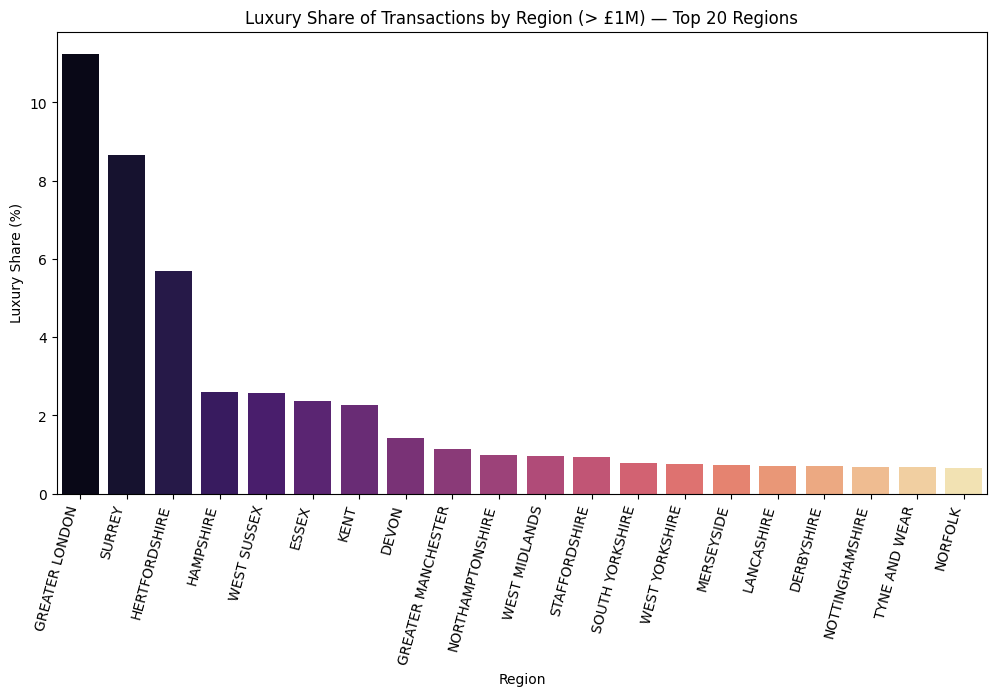

In [99]:
# --- Bar chart: Luxury share of transactions by region ---
plt.figure(figsize=(12,6))
sns.barplot(data=regional_comparison, x="county", y="luxury_share_transactions", palette="magma")
plt.xticks(rotation=75, ha="right")
plt.title("Luxury Share of Transactions by Region (> £1M) — Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Luxury Share (%)")
plt.show()


C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\2693565203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=regional_comparison, x="county", y="luxury_share_value", palette="viridis")


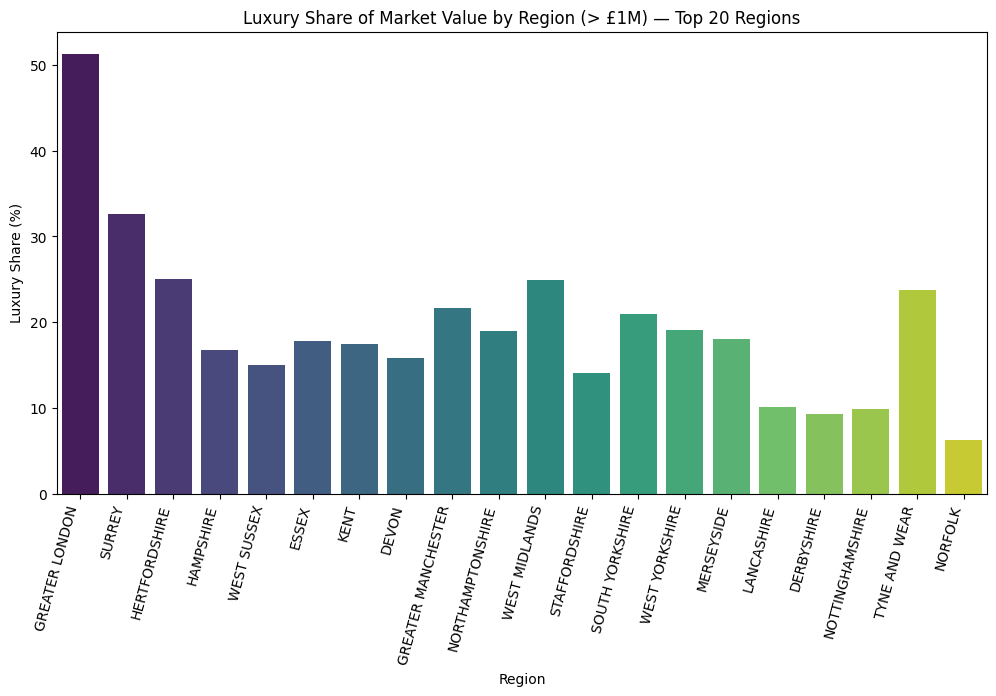

In [100]:
# --- Bar chart: Luxury share of market value by region ---
plt.figure(figsize=(12,6))
sns.barplot(data=regional_comparison, x="county", y="luxury_share_value", palette="viridis")
plt.xticks(rotation=75, ha="right")
plt.title("Luxury Share of Market Value by Region (> £1M) — Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Luxury Share (%)")
plt.show()

C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\2971538711.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10_luxury, x="county", y="count_luxury", palette="plasma")


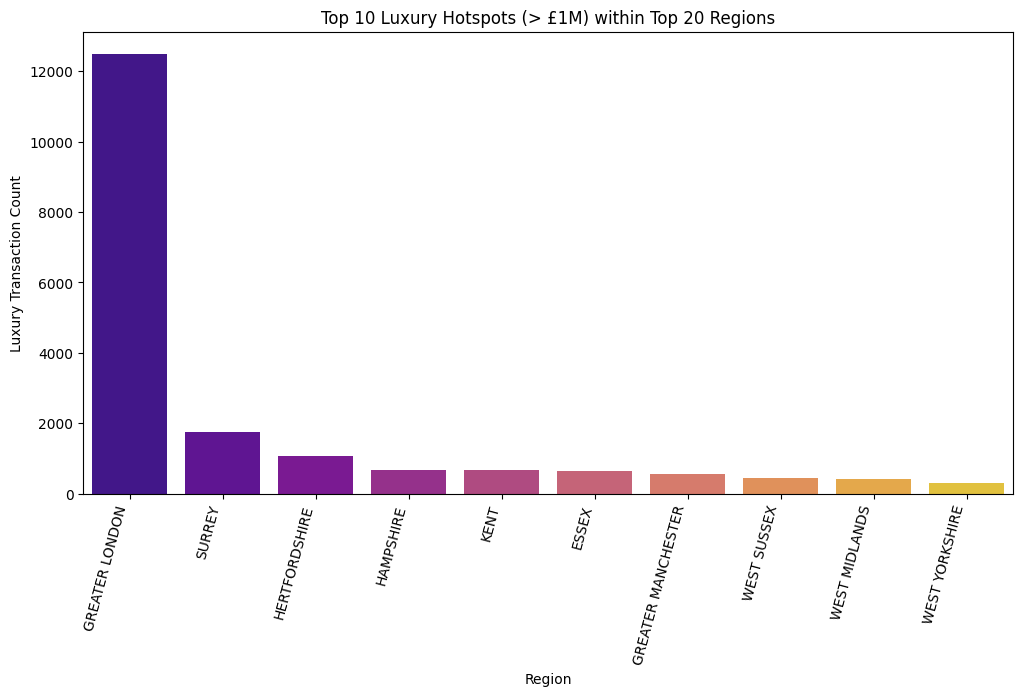

In [102]:
# --- Highlight top 10 luxury hotspots within top 20 ---
top10_luxury = regional_comparison.sort_values("count_luxury", ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(data=top10_luxury, x="county", y="count_luxury", palette="plasma")
plt.xticks(rotation=75, ha="right")
plt.title("Top 10 Luxury Hotspots (> £1M) within Top 20 Regions")
plt.xlabel("Region")
plt.ylabel("Luxury Transaction Count")
plt.show()

# Visualizations

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


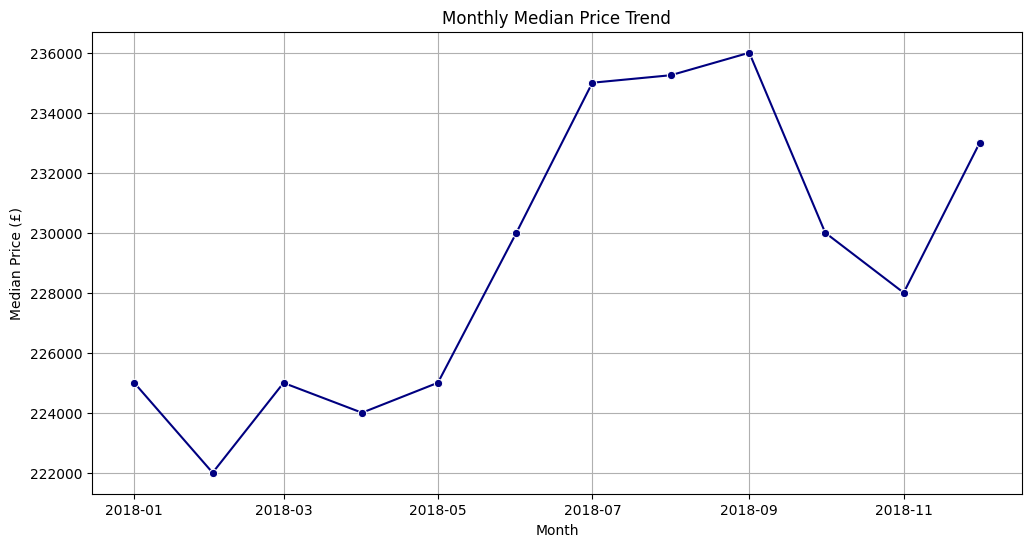

In [123]:
# ============================================================
# 1. Line chart: monthly median price trend
# ============================================================
df["month"] = df["date_of_transfer"].dt.to_period("M")
monthly_median = df.groupby("month")["price"].median().reset_index()
monthly_median["month"] = monthly_median["month"].dt.to_timestamp()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_median, x="month", y="price", marker="o", color="navy")
plt.title("Monthly Median Price Trend")
plt.xlabel("Month")
plt.ylabel("Median Price (£)")
plt.grid(True)
plt.show()

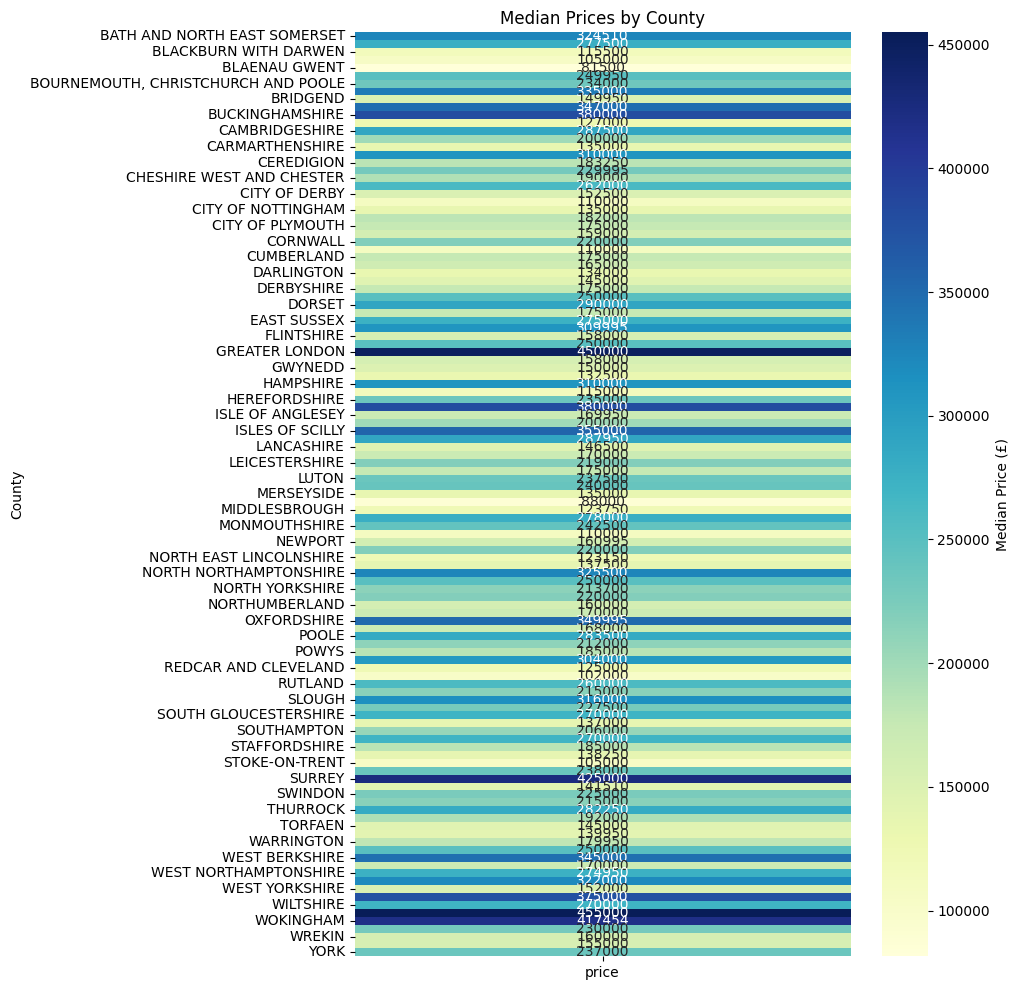

In [124]:
# ============================================================
# 2. Heatmap: median prices by county
# ============================================================
county_prices = df.groupby("county")["price"].median().reset_index()
county_prices = county_prices.pivot_table(index="county", values="price")

plt.figure(figsize=(8,12))
sns.heatmap(county_prices, cmap="YlGnBu", annot=True, fmt=".0f", cbar_kws={"label": "Median Price (£)"})
plt.title("Median Prices by County")
plt.xlabel("")
plt.ylabel("County")
plt.show()


C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\3216291252.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=property_counts, x="property_type", y="count", palette="Set2")


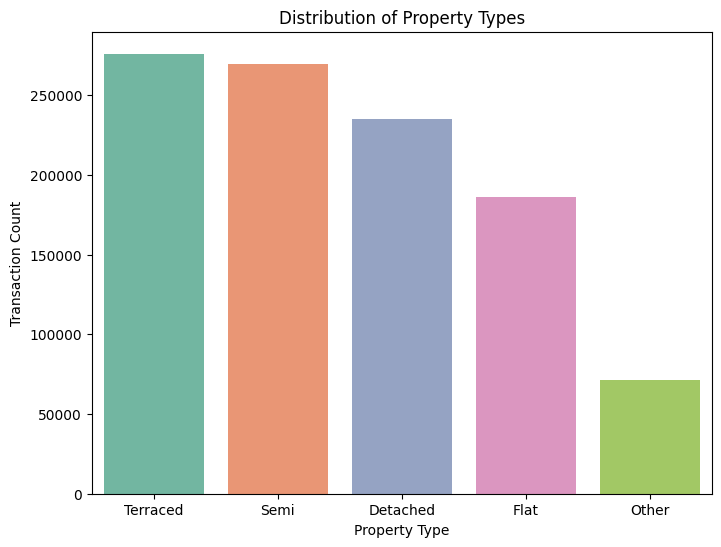

In [125]:
# ============================================================
# 3. Bar chart: distribution of property types
# ============================================================
property_counts = df["property_type"].value_counts().reset_index()
property_counts.columns = ["property_type", "count"]

plt.figure(figsize=(8,6))
sns.barplot(data=property_counts, x="property_type", y="count", palette="Set2")
plt.title("Distribution of Property Types")
plt.xlabel("Property Type")
plt.ylabel("Transaction Count")
plt.show()


C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\1592563779.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="tenure", y="price", palette="Pastel1")


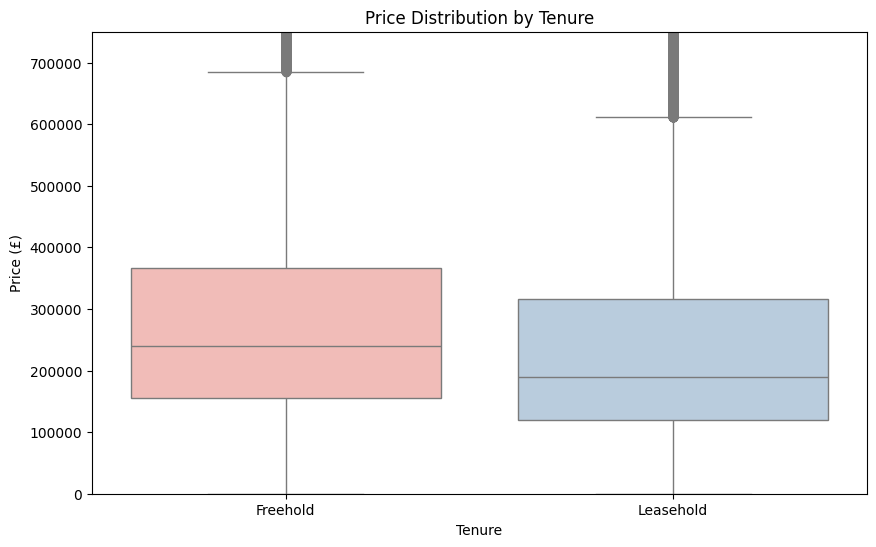

In [126]:
# ============================================================
# 4. Boxplot: price by tenure
# ============================================================
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="tenure", y="price", palette="Pastel1")
plt.title("Price Distribution by Tenure")
plt.xlabel("Tenure")
plt.ylabel("Price (£)")
plt.ylim(0, df["price"].quantile(0.95))  # trim extreme outliers
plt.show()


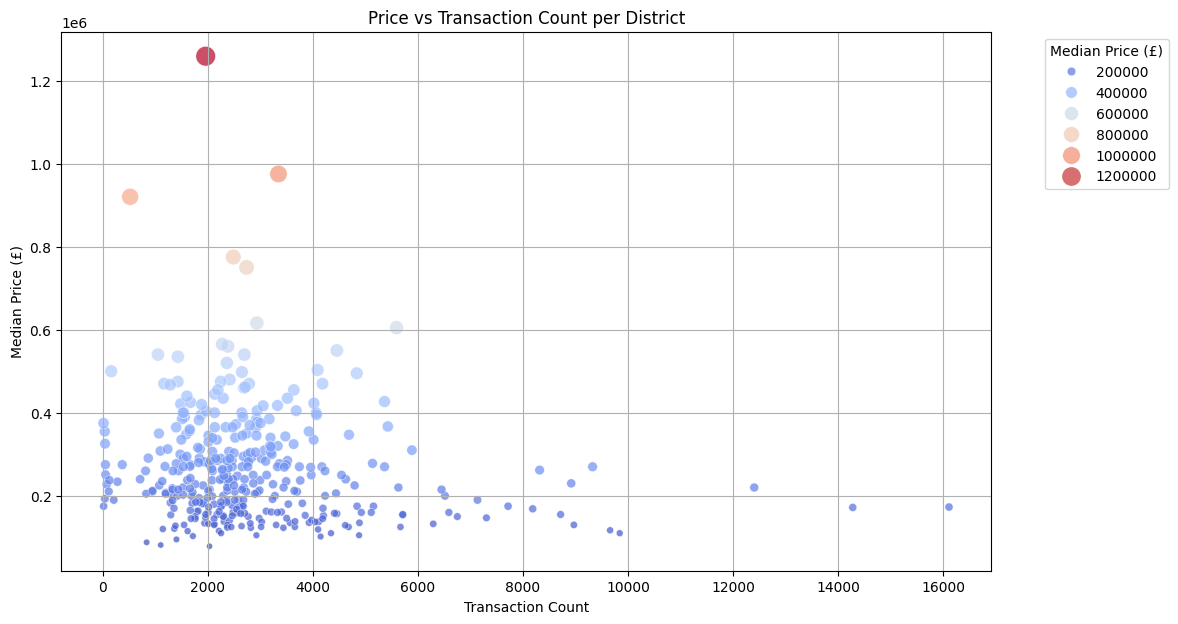

In [127]:
# ============================================================
# 5. Scatter: price vs transaction count per district
# ============================================================
district_stats = df.groupby("district")["price"].agg(["median", "count"]).reset_index()

plt.figure(figsize=(12,7))
sns.scatterplot(data=district_stats, x="count", y="median", size="median", hue="median", sizes=(20,200), palette="coolwarm", alpha=0.7)
plt.title("Price vs Transaction Count per District")
plt.xlabel("Transaction Count")
plt.ylabel("Median Price (£)")
plt.legend(title="Median Price (£)", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.show()

In [128]:
print(df.columns.tolist())


['transaction_id', 'price', 'date_of_transfer', 'postcode', 'property_type', 'new_build', 'tenure', 'paon', 'saon', 'street', 'locality', 'town_city', 'district', 'county', 'ppd_category_type', 'record_status', 'month', 'year', 'quarter', 'day_of_week', 'log_price', 'is_luxury', 'is_budget', 'full_address', 'price_band', 'month_num']


C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\2592493203.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="new_build", palette="Set2")


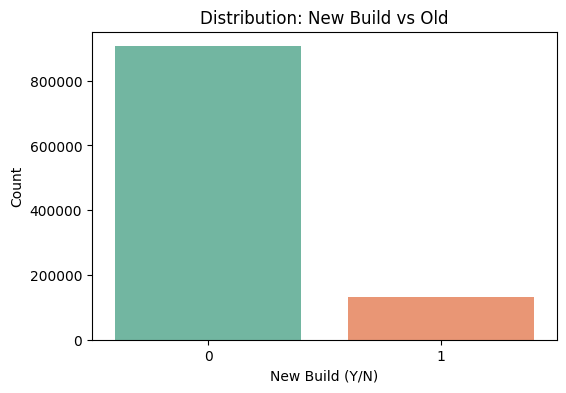

In [129]:
# --- 1. New Build vs Old ---
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="new_build", palette="Set2")
plt.title("Distribution: New Build vs Old")
plt.xlabel("New Build (Y/N)")
plt.ylabel("Count")
plt.show()

C:\Users\farhan\AppData\Local\Temp\ipykernel_17036\4143285717.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df["town_city"].isin(top20_towns)],


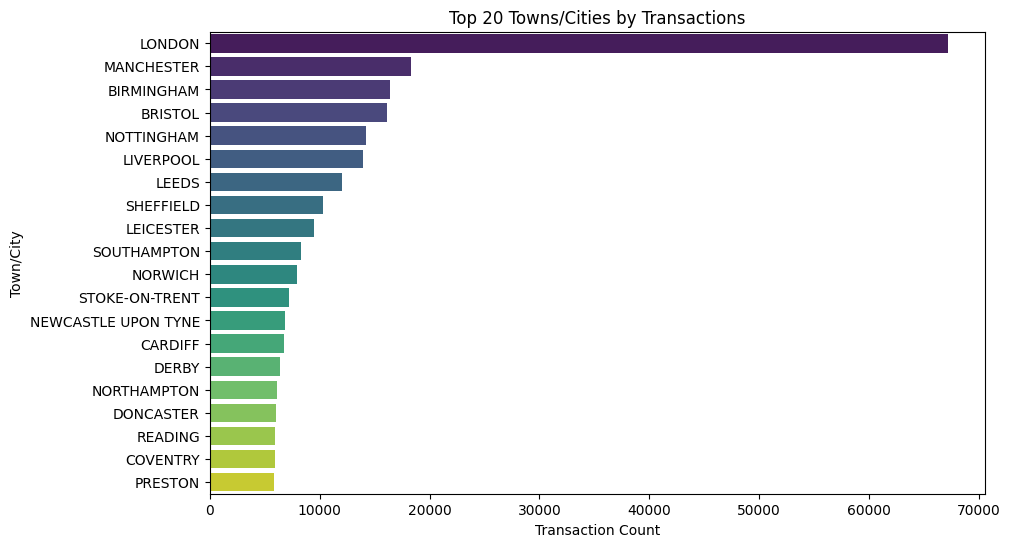

In [130]:
# --- 2. Town/City (Top 20 by frequency) ---
top20_towns = df["town_city"].value_counts().head(20).index
plt.figure(figsize=(10,6))
sns.countplot(data=df[df["town_city"].isin(top20_towns)], 
              y="town_city", order=top20_towns, palette="viridis")
plt.title("Top 20 Towns/Cities by Transactions")
plt.xlabel("Transaction Count")
plt.ylabel("Town/City")
plt.show()
